In [ ]:
import pandas as pd
import numpy as np
df = pd.DataFrame(np.load("events/events_20251210_200437.npy"))
df.columns = ['x', 'y', 't']
df

,x,y,t
0,0,27,21500993
1,1,27,21500997
2,0,27,21501081
3,1,27,21501189
4,0,27,21501419
...,...,...,...
28954,151,43,21619668
28955,152,44,21619737
28956,151,43,21619784
28957,146,42,21619786


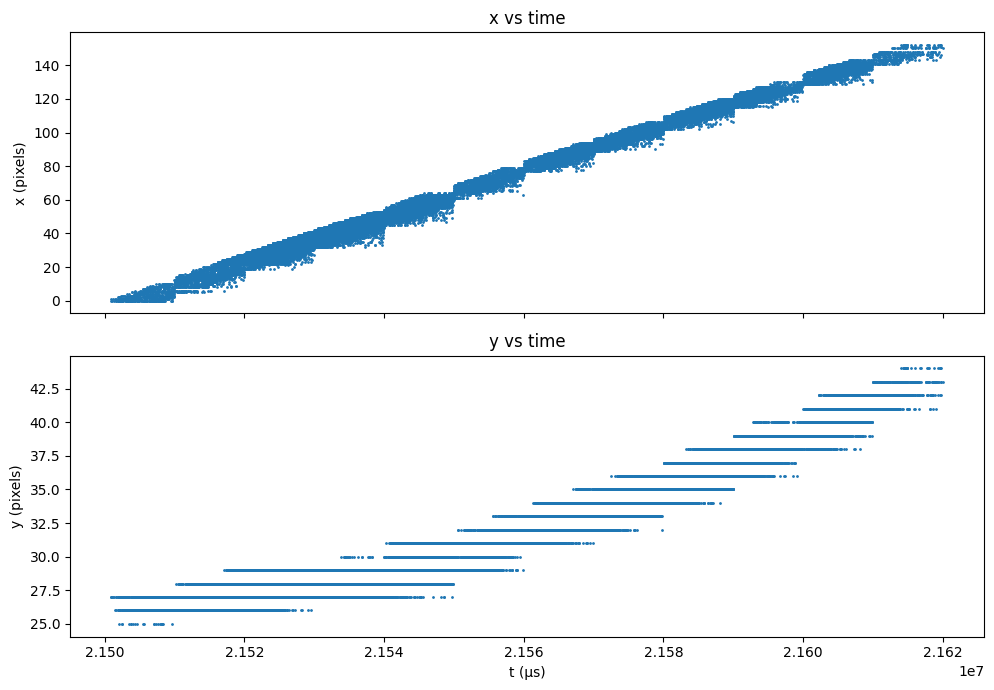

In [11]:
import matplotlib.pyplot as plt

t = df["t"].to_numpy()
x = df["x"].to_numpy()
y = df["y"].to_numpy()

time_a = 0e7  # start time in µs
time_b = 100e7  # end time in µs
mask = (t >= time_a) & (t <= time_b)
t = t[mask]
x = x[mask]
y = y[mask]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,7), sharex=True)

ax1.scatter(t, x, s=1, rasterized=True)
ax1.set_ylabel("x (pixels)")
ax1.set_title("x vs time")

ax2.scatter(t, y, s=1, rasterized=True)
ax2.set_xlabel("t (µs)")
ax2.set_ylabel("y (pixels)")
ax2.set_title("y vs time")

plt.tight_layout()
plt.show()

In [12]:
import plotly.graph_objects as go
import numpy as np

# ---- BUILD INTERACTIVE 3D FIG ----
fig = go.Figure(data=[
    go.Scatter3d(
        x=x,
        y=y,
        z=t,
        mode='markers',
        marker=dict(
            size=2,
            color=t,        # color by time
            colorscale='Viridis',
            opacity=0.8
        )
    )
])

fig.update_layout(
    title="Interactive 3D Bullet Trajectory (x, y, t)",
    scene=dict(
        xaxis_title="x_bin (virtual pixels)",
        yaxis_title="y_bin (virtual pixels)",
        yaxis=dict(range=[0, 120]),
        zaxis_title="time (µs)"
    ),
    width=900,
    height=700
)

fig.show()